# Assignment 5
## Patrick (Pengyuan) Li 🌰
### Wed 21th, Nov

In [141]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist,squareform
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics import silhouette_score
from itertools import combinations

In [39]:
# read excel file into pandas dataframe
df = pd.read_excel('Cereals.xlsx', sheet_name = 'Data from DASL', index_col = 'name')

In [40]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 15 columns):
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       76 non-null float64
sugars      76 non-null float64
potass      75 non-null float64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.6+ KB


In [49]:
originalrow= len(df.index)
originalrow

77

## Data preprocessing

#### Keep numerical value column

In [58]:
df.drop(['mfr', 'type'], axis=1,inplace= True)

In [61]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


#### Remove missing value

In [42]:
df.isnull().any()
# missing values exists in column 'carbo','sodium','potass'

mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo        True
sugars       True
potass       True
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

In [62]:
df1 = df.dropna()

In [52]:
newrow = len(df1.index)
rowsremoved = originalrow - newrow

In [53]:
print('Number of rows removed = ', rowsremoved)

Number of rows removed =  3


#### Normalize the data (z-transformation)

In [63]:
df1.head(5)
# check the data before normalization

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


In [64]:
from sklearn import preprocessing

In [71]:
# transformer = preprocessing.Normalizer()
# transformer.transform(df1)

In [69]:
df2 = preprocessing.normalize(df1, norm='l2')

In [72]:
df2 = pd.DataFrame(df2)

In [75]:
df2.index = df1.index

In [82]:
df2.head()
# the data after normalization

,0,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,,
100%_Bran,0.215316,0.012304,0.003076,0.399873,0.030759,0.015380,0.018456,0.861265,0.076899,0.009228,0.003076,0.001015,0.210404
100%_Natural_Bran,0.649058,0.016226,0.027044,0.081132,0.010818,0.043271,0.043271,0.730190,0.000000,0.016226,0.005409,0.005409,0.183811
All-Bran,0.165342,0.009448,0.002362,0.614126,0.021258,0.016534,0.011810,0.755848,0.059051,0.007086,0.002362,0.000779,0.140364
All-Bran_with_Extra_Fiber,0.133302,0.010664,0.000000,0.373245,0.037324,0.021328,0.000000,0.879791,0.066651,0.007998,0.002666,0.001333,0.249820
Apple_Cinnamon_Cheerios,0.486522,0.008846,0.008846,0.796126,0.006634,0.046441,0.044229,0.309605,0.110573,0.004423,0.004423,0.003317,0.130518


## Clustering

####  Single Linkage 

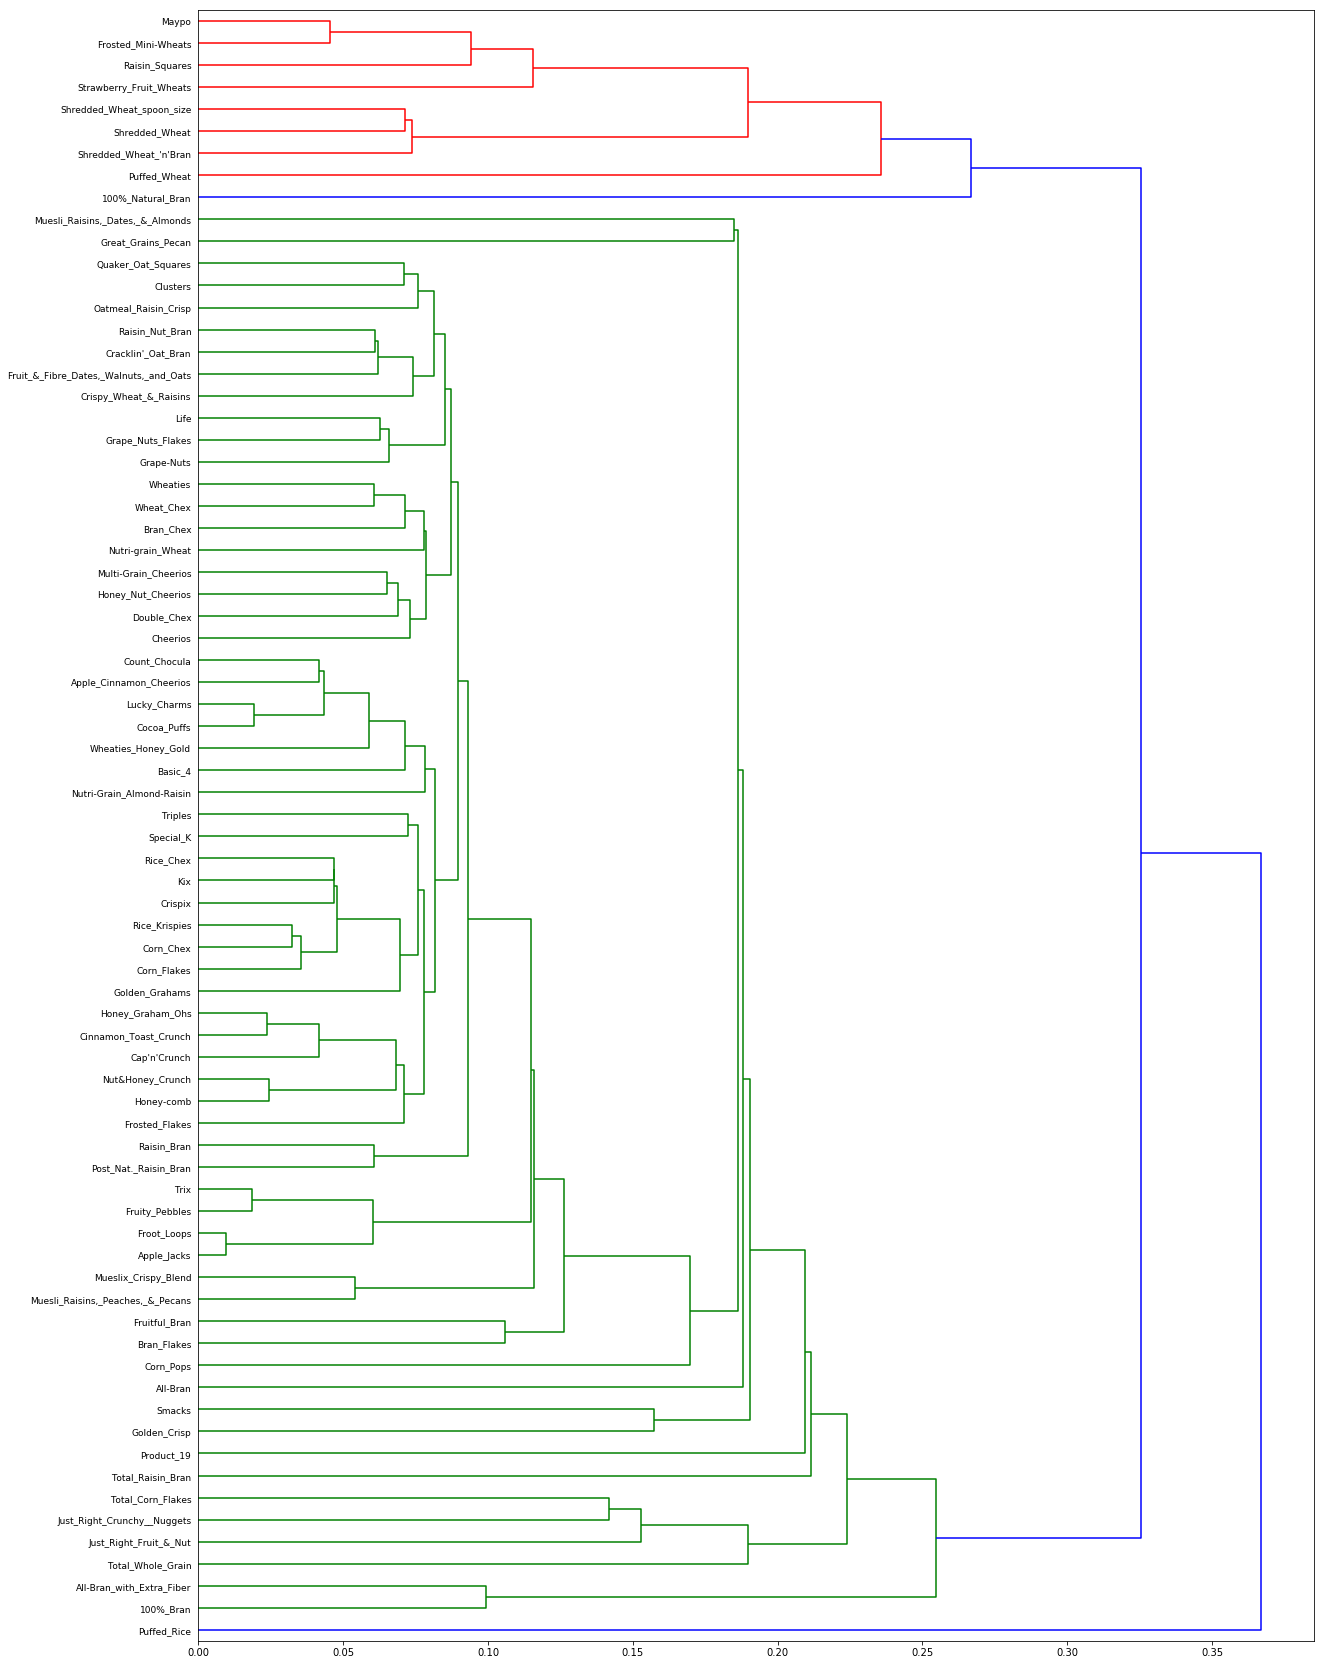

In [137]:
link = linkage(df2, method='single', metric='euclidean')
fig, ax = plt.subplots(1, figsize=(20, 30))


dendro = dendrogram(link, color_threshold=None, leaf_font_size=9,get_leaves=True,truncate_mode=None, 
orientation='right', labels=df2.index, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, 
no_labels=False,  leaf_rotation=None, leaf_label_func=None, 
 show_contracted=False, link_color_func=None, ax=None)

plt.savefig('single')
plt.show()


#### Complete linkge

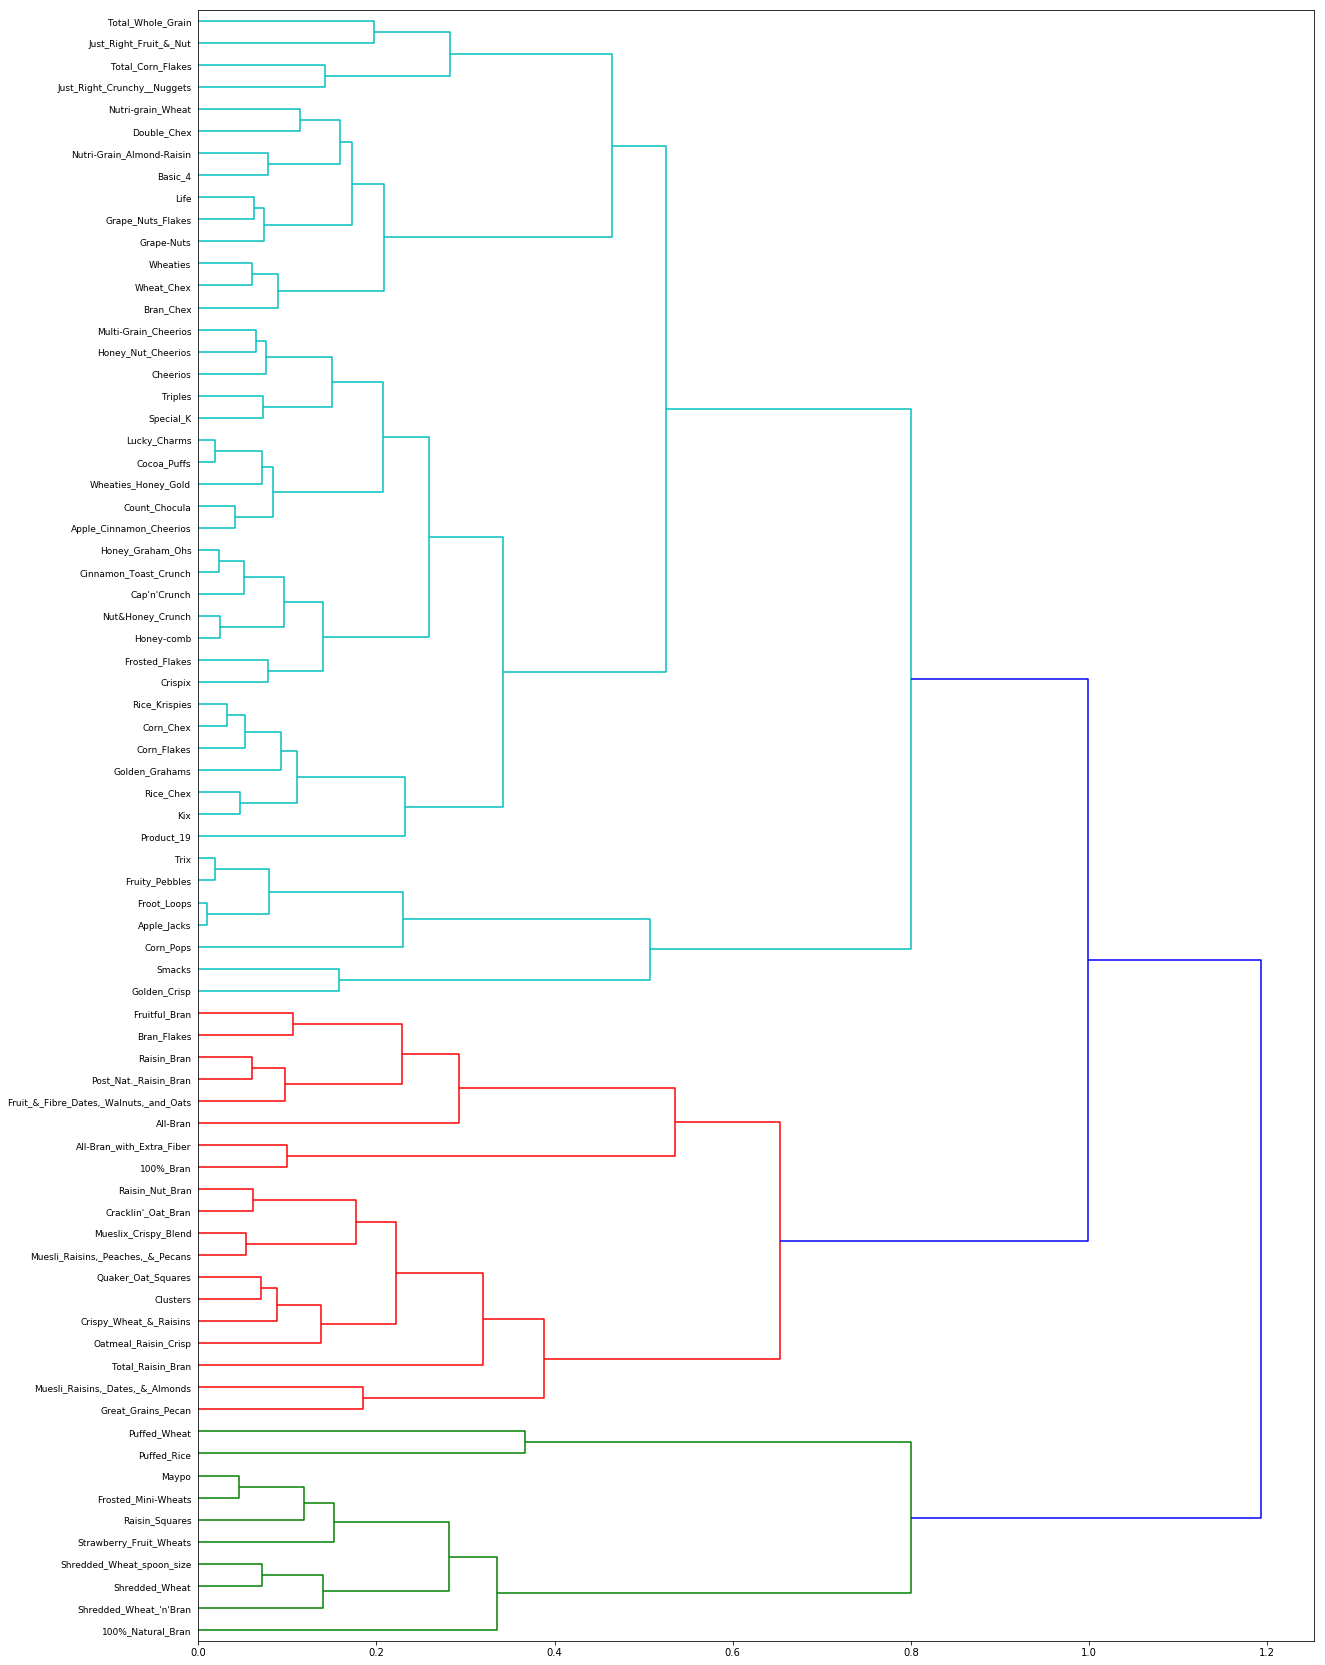

In [171]:
link = linkage(df2, method='complete', metric='euclidean')
fig, ax = plt.subplots(1, figsize=(20, 30))


dendro = dendrogram(link, color_threshold=None, leaf_font_size=9,get_leaves=True,truncate_mode=None, 
orientation='right', labels=df2.index, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, 
no_labels=False,  leaf_rotation=None, leaf_label_func=None, 
 show_contracted=False, link_color_func=None, ax=None)

plt.savefig('com')
plt.show()

##### Which method produces more meaningful clusters? Why?

In single-link clustering or single-linkage clustering , the similarity of two clusters is the similarity of their most similar members, more distant parts of the cluster and the clusters' overall structure are not taken into account.In complete-link clustering or complete-linkage clustering , the similarity of two clusters is the similarity of their most dissimilar members, and the entir structure is considered.   

https://nlp.stanford.edu/IR-book/html/htmledition/single-link-and-complete-link-clustering-1.html

According to the result of these two different method, complete linkage is recommended in this case, cause it can create more clusters and generate more meaningful results.

##### How many clusters do you recommend? How many cereals are there in each cluster?

I would recommend 5 clusters and 38 cereals in cluster 1, 7 ceareals in cluster 2, 19 in cluster 3, 2 cereals in cluster 4 and 8 cereals in cluster 5.


### K-means 

In [179]:
df2.shape

(74, 13)

In [176]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [180]:
print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[0.4447801  0.01155223 0.00455526 0.73451843 0.00984157 0.06349207
  0.02585704 0.42179279 0.14657933 0.01014497 0.00438534 0.00301565
  0.17954306]
 [0.58805142 0.01701275 0.00336455 0.01850309 0.01348976 0.10388814
  0.01812115 0.61827183 0.06594027 0.0162238  0.00604101 0.00647405
  0.44141646]
 [0.39968795 0.01156998 0.00633785 0.53081871 0.01742387 0.04252292
  0.02952683 0.68675555 0.10253351 0.01023993 0.00391275 0.00219605
  0.15693801]
 [0.42048626 0.00741637 0.00318315 0.86021968 0.00161508 0.06185044
  0.02739787 0.17784679 0.11649019 0.00659476 0.00378256 0.00362618
  0.12738624]
 [0.6788657  0.01003929 0.00337864 0.6251141  0.00357529 0.07204692
  0.08414075 0.19228427 0.15686693 0.01141448 0.00627468 0.0056916
  0.20198817]]


In [213]:
labels = pd.DataFrame(kmeans.labels_)
labels.index= df2.index
labels.info()
print(labels.head())

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 1 columns):
0    74 non-null int32
dtypes: int32(1)
memory usage: 3.4+ KB
                           0
name                        
100%_Bran                  2
100%_Natural_Bran          1
All-Bran                   2
All-Bran_with_Extra_Fiber  2
Apple_Cinnamon_Cheerios    0


In [217]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-14:-1]
print("features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(df2.index[i] for i in centroid)))

features for each cluster:
0: All-Bran_with_Extra_Fiber, 100%_Bran, Bran_Chex, Clusters, Bran_Flakes, Apple_Jacks, Basic_4, 100%_Natural_Bran, Cap'n'Crunch, Apple_Cinnamon_Cheerios, All-Bran, Cheerios, Cinnamon_Toast_Crunch
1: Bran_Chex, 100%_Bran, Clusters, Apple_Jacks, Bran_Flakes, All-Bran_with_Extra_Fiber, Basic_4, 100%_Natural_Bran, Cap'n'Crunch, Apple_Cinnamon_Cheerios, Cinnamon_Toast_Crunch, Cheerios, All-Bran
2: Bran_Chex, All-Bran_with_Extra_Fiber, 100%_Bran, Clusters, Bran_Flakes, Apple_Jacks, Basic_4, Apple_Cinnamon_Cheerios, 100%_Natural_Bran, Cap'n'Crunch, All-Bran, Cheerios, Cinnamon_Toast_Crunch
3: All-Bran_with_Extra_Fiber, 100%_Bran, Bran_Chex, Clusters, Bran_Flakes, Apple_Jacks, Basic_4, 100%_Natural_Bran, Cap'n'Crunch, Cheerios, Cinnamon_Toast_Crunch, All-Bran, Apple_Cinnamon_Cheerios
4: 100%_Bran, All-Bran_with_Extra_Fiber, Clusters, Bran_Chex, Bran_Flakes, Basic_4, Apple_Jacks, Cap'n'Crunch, 100%_Natural_Bran, Cheerios, Cinnamon_Toast_Crunch, Apple_Cinnamon_Cheerio

##### Healthiness table for cereals in cluster 0

In [274]:
# generate the dataframe which contains the column calories, fat, sodium, sugar and protein 
# for cereals in different clusters, it will be helpful to compare their healthiness


list = labels[labels[0] == 0]
df4 = df1[['calories','protein','fat','sodium','sugars','rating']]
df5 = df4.loc[list.index]
df5.describe()

,calories,protein,fat,sodium,sugars,rating
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,109.000000,2.800000,1.100000,182.250000,6.350000,43.490230
std,15.183093,0.615587,0.718185,32.137656,2.814904,7.990124
min,90.000000,2.000000,0.000000,135.000000,2.000000,29.509541
25%,100.000000,2.000000,1.000000,165.000000,4.500000,36.909842
50%,100.000000,3.000000,1.000000,175.000000,6.000000,42.673174
75%,112.500000,3.000000,2.000000,202.500000,8.250000,49.580767
max,140.000000,4.000000,2.000000,240.000000,12.000000,59.642837


##### Healthiness table for cereals in cluster 1


In [275]:
list = labels[labels[0] == 1]
df4 = df1[['calories','protein','fat','sodium','sugars','rating']]
df6 = df4.loc[list.index]
df6.describe()

,calories,protein,fat,sodium,sugars,rating
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,86.000000,2.500000,0.600000,3.000000,2.900000,60.114925
std,21.705094,0.849837,1.577621,6.324555,3.314949,11.445232
min,50.000000,1.000000,0.000000,0.000000,0.000000,33.983679
25%,82.500000,2.000000,0.000000,0.000000,0.000000,56.086142
50%,90.000000,2.500000,0.000000,0.000000,1.500000,60.060052
75%,97.500000,3.000000,0.000000,0.000000,5.750000,66.928325
max,120.000000,4.000000,5.000000,15.000000,8.000000,74.472949


##### Healthiness table for cereals in cluster 2

In [276]:
list = labels[labels[0] == 2]
df4 = df1[['calories','protein','fat','sodium','sugars','rating']]
df7 = df4.loc[list.index]
df7.describe()

,calories,protein,fat,sodium,sugars,rating
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,112.142857,3.357143,1.642857,160.714286,8.571429,46.357907
std,33.091614,0.497245,1.081818,49.023430,4.237457,17.510978
min,50.000000,3.000000,0.000000,75.000000,0.000000,28.592785
25%,92.500000,3.000000,1.000000,140.000000,5.250000,37.312796
50%,120.000000,3.000000,1.500000,150.000000,9.000000,40.076086
75%,135.000000,4.000000,2.750000,197.500000,11.750000,51.438289
max,160.000000,4.000000,3.000000,260.000000,14.000000,93.704912


##### Healthiness table for cereals in cluster 3

In [277]:
list = labels[labels[0] == 3]
df4 = df1[['calories','protein','fat','sodium','sugars','rating']]
df8 = df4.loc[list.index]
df8.describe()

,calories,protein,fat,sodium,sugars,rating
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,110.869565,2.043478,0.826087,233.043478,6.826087,34.440072
std,5.146087,1.397344,0.834058,42.898907,4.292193,10.292353
min,100.000000,1.000000,0.000000,180.000000,1.000000,18.042851
25%,110.000000,1.000000,0.000000,200.000000,3.000000,25.269279
50%,110.000000,2.000000,1.000000,220.000000,8.000000,36.187559
75%,110.000000,2.000000,1.000000,270.000000,11.000000,41.474280
max,120.000000,6.000000,3.000000,320.000000,13.000000,53.131324


##### Healthiness table for cereals in cluster 4

In [281]:
list = labels[labels[0] == 4]
df4 = df1[['calories','protein','fat','sodium','sugars','rating']]
df9 = df4.loc[list.index]
df9.describe()

,calories,protein,fat,sodium,sugars,rating
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,108.571429,1.571429,0.571429,104.285714,13.285714,31.918004
std,3.779645,0.534522,0.534522,36.449574,1.380131,3.180258
min,100.000000,1.000000,0.000000,45.000000,12.000000,27.753301
25%,110.000000,1.000000,0.000000,80.000000,12.000000,29.627910
50%,110.000000,2.000000,1.000000,125.000000,13.000000,32.207582
75%,110.000000,2.000000,1.000000,130.000000,14.500000,34.213269
max,110.000000,2.000000,1.000000,140.000000,15.000000,35.782791


### According to the description tables of these 5 clusters, I made a table for easily compare their healthiness.


|Cluster|Calories|Protein|Fat|Sodium|Sugers|Rating|
|---|---:|:---:|:---:|:---:|:---:|---:|
|Cluster 0|109  |2.8  |1.1  |182.25|6.35  |43.49|
|Cluster 1|86   |2.5  |0.6  |3    |2.9  |60.11|
|Cluster 2|112.14|3.35|1.65|160.71|8.57|46.36|
|Cluster 3|110.87|2.04|0.82|233.04|6.83|34.44|
|Cluster 4|108.57|1.57|0.57|104.29|13.29|31.92|

### According to the descriptions of the data on different cereals in these 5 clusters. We can see that cluster 1 is most healthy amount the 5 clusters, it cobtains high protein and low cal low sugers and low fat and sodium. Therefore I would like to recommend the primary school choose the cereals in cluster 1 and the rating for cluster 1 is highest, so the student will like the cereals in the cluster 1.

In [282]:
df6

,calories,protein,fat,sodium,sugars,rating
name,,,,,,
100%_Natural_Bran,120,3,5,15,8.0,33.983679
Frosted_Mini-Wheats,100,3,0,0,7.0,58.345141
Maypo,100,4,1,0,3.0,54.850917
Puffed_Rice,50,1,0,0,0.0,60.756112
Puffed_Wheat,50,2,0,0,0.0,63.005645
Raisin_Squares,90,2,0,0,6.0,55.333142
Shredded_Wheat,80,2,0,0,0.0,68.235885
Shredded_Wheat_'n'Bran,90,3,0,0,0.0,74.472949
Shredded_Wheat_spoon_size,90,3,0,0,0.0,72.801787


In [289]:
print('The name of the cereals in cluster 1:')
print(df6.index)

The name of the cereals in cluster 1:
Index(['100%_Natural_Bran', 'Frosted_Mini-Wheats', 'Maypo', 'Puffed_Rice',
       'Puffed_Wheat', 'Raisin_Squares', 'Shredded_Wheat',
       'Shredded_Wheat_'n'Bran', 'Shredded_Wheat_spoon_size',
       'Strawberry_Fruit_Wheats'],
      dtype='object', name='name')


### I will recommend the cereals above to the prime school.